# __Clustering Users by Description__

In [1]:
import networkx as nx
import pandas as pd

In [2]:
# loading the complete network graph
tt_network = nx.read_gexf('data/networks/complete_network.gexf')

In [3]:
print('Number of users: ', len(tt_network.nodes()))

Number of users:  320143


In [4]:
users = []

for u,d in tt_network.nodes(data=True):
    users.append((u, d['displayname'], d['description']))
    
users_df = pd.DataFrame(users, columns=['user_name', 'display_name', 'description'])
users_df.shape

(320143, 3)

In [5]:
users_df.head()

,user_name,display_name,description
0,seguezaqueu,Zaqueu Castelamary 🏴🏳(SDV ? ),nan
1,zaqueusdvPT,Segue de Volta Esquerdistas ?,nan
2,OSul_noticias,Jornal O Sul,nan
3,farah_julioo,Julio Patriota38🇧🇷🇧🇷🇧🇷,nan
4,thetunnes,Tunnes,21y | 🇧🇷 || Jogador de Valorant 💢 | Web Devel...


In [6]:
users_df.loc[users_df['description'] == 'nan']

,user_name,display_name,description
0,seguezaqueu,Zaqueu Castelamary 🏴🏳(SDV ? ),nan
1,zaqueusdvPT,Segue de Volta Esquerdistas ?,nan
2,OSul_noticias,Jornal O Sul,nan
3,farah_julioo,Julio Patriota38🇧🇷🇧🇷🇧🇷,nan
5,joaodoria45,joaodoria45,nan
...,...,...,...
320134,Eiras_Sergio,Sergio Eiras ⬅️1️⃣3️⃣,nan
320136,ManoelF33446796,Manoel Filho,nan
320138,AbreuWelinson,Welinson Abreu,nan
320139,DeLurimar,Lurimar De Andrade Passos,nan


In [7]:
users_df.drop(users_df.loc[users_df['description'] == 'nan'].index, inplace=True)
users_df.reset_index(inplace=True, drop=True)
users_df.shape

(164944, 3)

In [8]:
users_df.head()

,user_name,display_name,description
0,thetunnes,Tunnes,21y | 🇧🇷 || Jogador de Valorant 💢 | Web Devel...
1,eriicksonsilva,Erickson,"25, BR\nFalo merda sobre o: @vascodagama @manu..."
2,DarlyMenconi,Darly Menconi🏴😷🐊,nobody wins unless everybody wins\npsicóloga🦋
3,danconservador,Danconservador 🇧🇷,Anti-Comunista 🇧🇷..... Nossa bandeira nunca se...
4,SuperTorresmo,Alexandre O Grande,Astrofísico.


## Data Prepocessing

In [9]:
from unidecode import unidecode
import re, string, nltk, demoji
from deep_translator import GoogleTranslator

In [10]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words.append('pra')
stop_words.append('tá')
stop_words.append('sobre')

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    
    return emoji_pattern.sub(r'', tweet)

def remove_link(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'bit.ly/\S+', '', tweet)
    tweet = tweet.strip('[link]')
    tweet = re.sub(r'pic.twitter\S+', '', tweet)
    return tweet

def remove_av(tweet):
    tweet = re.sub(r'VIDEO:', '', tweet)
    tweet = re.sub(r'AUDIO:', '', tweet)
    return tweet

def preproc(text):
    #emojis_dict = demoji.findall(text)
    #t_emojis = []
    #if bool(emojis_dict):
    #    for k in  emojis_dict:
    #        t_emojis.append(GoogleTranslator(source='english', target='portuguese').translate(emojis_dict[k]))
    #text = ' '.join(text.split()+t_emojis)
    text = remove_emoji(text)
    text = remove_link(text)
    text = remove_av(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if len(word)>2 and word not in stop_words])
    return text

In [11]:
users_df['preproc_desc'] = users_df['description'].map(lambda x: unidecode(preproc(x)))
users_df.head()

,user_name,display_name,description,preproc_desc
0,thetunnes,Tunnes,21y | 🇧🇷 || Jogador de Valorant 💢 | Web Devel...,jogador valorant web developer
1,eriicksonsilva,Erickson,"25, BR\nFalo merda sobre o: @vascodagama @manu...",falo merda vascodagama manutd okcthunder
2,DarlyMenconi,Darly Menconi🏴😷🐊,nobody wins unless everybody wins\npsicóloga🦋,obody wins unless everybody wins psicologa
3,danconservador,Danconservador 🇧🇷,Anti-Comunista 🇧🇷..... Nossa bandeira nunca se...,anticomunista bandeira nunca vermelha porra
4,SuperTorresmo,Alexandre O Grande,Astrofísico.,astrofisico


## TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vec = TfidfVectorizer()
vec.fit(users_df['preproc_desc'])
features = vec.transform(users_df['preproc_desc'])

## K-Means

In [14]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from mpl_toolkits import mplot3d

In [15]:
#silhouette_avg = []
#for cluster in range(2, 10):
#    cls = MiniBatchKMeans(n_clusters=cluster)
#    cls.fit(features)
    #silhouette_avg = v_measure_score(features.toarray(), cls.labels_)

In [16]:
#cls = MiniBatchKMeans(n_clusters=3, random_state=123)
#cls.fit(features)

In [17]:
#cls.predict(features)

In [18]:
#cls.labels_

In [19]:
from sklearn.cluster import KMeans

In [20]:
sum_of_squared_distances = []
for k in range(2,10):
    print('Clustering K = ', k)
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km.fit(features)
    sum_of_squared_distances.append(km.inertia_)

Clustering K =  2
Clustering K =  3
Clustering K =  4
Clustering K =  5
Clustering K =  6
Clustering K =  7
Clustering K =  8
Clustering K =  9


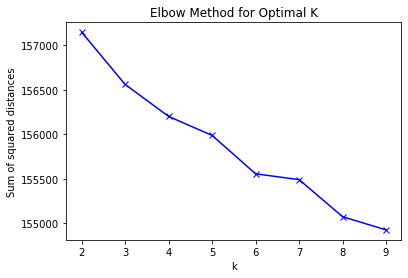

In [22]:
plt.plot(range(2,10), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [26]:
true_k = 6
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_

In [33]:
pd.Series(labels).value_counts()

0    146095
2      4883
5      4408
4      3889
1      3354
3      2315
dtype: int64

In [34]:
len(labels)

164944

In [36]:
from wordcloud import WordCloud

In [46]:
result = pd.DataFrame({'user': users_df['user_name'], 'description': users_df['preproc_desc'], 'cluster':labels})

Cluster :  0


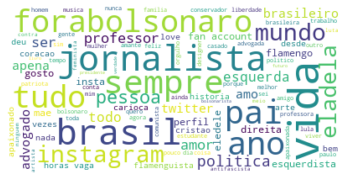

Cluster :  1


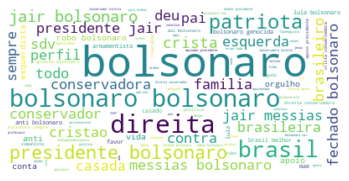

Cluster :  2


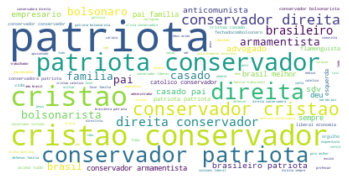

Cluster :  3


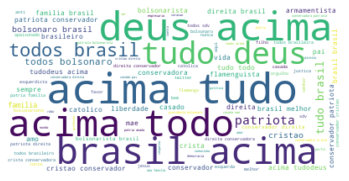

Cluster :  4


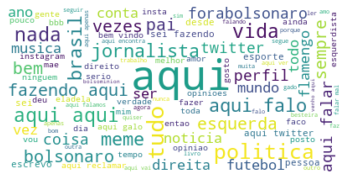

Cluster :  5


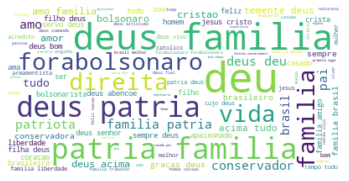

In [47]:
for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['description'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [43]:
result[result['cluster']==1].sample(10)

,user,description,cluster
12929,adroth_br,Perfil dedicado a apoiar o Presidente Jair Bol...,1
28256,Luizdec71174637,fora Bolsonaro genocída,1
12379,MBellinzaghi,"Mãe, devota de Nossa Senhora, libriana, flamen...",1
132178,oso_lea,"casada, vó de dois lindos netos, odeia os part...",1
26849,Patovaldo1,BOLSONARO MITO,1
148692,desertodarainha,FORA BOLSONARO.,1
38482,AneteOliveira6,Casada com a causa conservadora . 1000 por cen...,1
54693,NahrGilda,"Direita segue direita. Anti esquerda, pt e pux...",1
4721,MARIUZAKRAUSE,"Direita, conservadora, bolsonariana, gado do B...",1
959,ElianeBreder1,"Mãe, avó da Alice e do Pedro. É por eles que l...",1


In [44]:
result[result['cluster']==0].sample(10)

,user,description,cluster
58106,nanoguardbrasil,"Ambientalista, professor de Geografia mestrand...",0
31153,CatmunizMuniz,Writer. Dancer. Dreamer. Lover.,0
75550,bernardocorazza,Economia | Investimentos | Política 🇧🇷,0
69939,CaroLaPetite,Bonjour-Hi 🇨🇦 / Oiê! 🇧🇷 Insta:...,0
30089,painelcovid19,Painel COVID-19 - Estatísticas do Coronavírus\...,0
114222,FRANCIS90403552,ARTISTA PLÁSTICO PINTURA ABSTRATA.,0
94961,luvzgo,⠀⠀⠀ ⠀ ❛𝘥𝘦𝘰𝘬 𝘤𝘩𝘶𝘭'𝘴 𝘷𝘰𝘪𝘤𝘦: 𝘥𝘪𝘥 𝘺𝘰𝘶 𝘴𝘰𝘢𝘳?❜⠀ ⠀ ⠀⠀...,0
128582,PirotecnicoZ,"Metade liberal, metade conservador e completam...",0
118287,LimaCamila,Tô só dando uma olhadinha.,0
11386,lindomarandrad5,"Mãe da divina providência, providenciai , para...",0


In [45]:
result[result['cluster']==2].sample(10)

,user,description,cluster
33010,opropiowashi,23y- Cristão ❤️- Jornalista e Estudante de dir...,2
130080,Grasy18909835,Patriota - Bolsonarista 🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷,2
99983,HENRIQUELIND,"Patriota, em luta pela liberdade e anti mimimi...",2
116985,JULIOCESARSSIL5,Patriota!! ❤ o Brasil!!\n#BrasilAcimaDeTudoEDe...,2
46069,PpfMarco,"Paulistano, conservador, patriota, cristão, ar...",2
51909,Francisbah82,"Representante comercial, conservador e patriota.",2
27223,comunica_f,"Ridendo Dicere Veritas. \nRadialista, Jornalis...",2
129145,ARSOBRAL1,"Patriota, Conservador !!!\nO meu BRASIL é Verd...",2
130442,JacionSilva,"Filho, esposo, pai, cristão, analista de siste...",2
11052,MachadoAssis5,"Conservador, no melhor sentido do termo! 🇧🇷🇧🇷...",2


In [48]:
result[result['cluster']==3].sample(10)

,user,description,cluster
12761,FrotaGoncalves,brasileira advogada espirita familia bolsonari...,3
134647,ClauCouto38,brasil acima tudo deus acima todos,3
120351,IMPRESSOR2022,brasil acima tudo deus acima todos,3
115576,jrmacul,deus acima todos conservador direita politicam...,3
52449,Willian65345247,carioca admirador coisas simples natureza sim ...,3
129256,MelBolsonaro,bolsonarista crista armamentista conservadora ...,3
474,Paulo51988461,pais melhor justo deus acima todos,3
36550,wpereira48,brasil acima tudo,3
135314,elizeualves17,concervador alma coracao amo pais brasil brasi...,3
56907,Gildo97967503,patriota direita brasil acima tudo deus acima ...,3


In [49]:
result[result['cluster']==4].sample(10)

,user,description,cluster
21493,Riicardodf,desativado instagram outro perfil aqui twitter...,4
95299,CatanhoJr,quer privacidade vai pro whatsapp aqui falamos...,4
53417,janammelo_,aqui segue insta janammelo,4
63915,RoseAne39060766,aqui espaco haters facistas genocidas psicopat...,4
48189,WillSodTav,aqui obrigando,4
40519,lucas_patricio,cofundador agencia gmd produtora halfdeafpod o...,4
64929,erikito69,eledele formado deboche especialista jogar ver...,4
34909,Rosanagcb,aqui espaco registro sinto penso momento,4
118083,DilmaraReischak,gilead aqui,4
33522,IuriCupertino,fcknzs aqui nesse perfil falado politica relig...,4


In [50]:
result[result['cluster']==5].sample(10)

,user,description,cluster
38699,Antonio12867631,linda familia,5
29762,RobsonGomes,jornalista familia flamenguista esquerdista lu...,5
80137,Gustavo47894936,forabolsonaro,5
86402,OLulaEstaPreso,preco liberdade eterna vigilancia dai cesar ce...,5
46432,LCampioti,conservadora amo deus familia patria liberdade...,5
72150,detemarques,forabolsonaro,5
73112,SrOliveirra,obrigado forabolsonaro cristao macumbeiro fami...,5
90444,Jonatha24299089,deus louvado,5
3179,KGF71853656,deus,5
78788,Leandro45215290,ser filho deus,5


In [61]:
true_k = 3
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_
pd.Series(labels).value_counts()

1    152547
0     10004
2      2393
dtype: int64

Cluster :  0


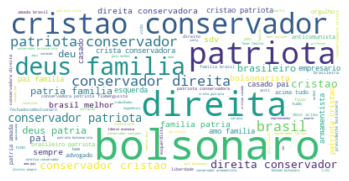

Cluster :  1


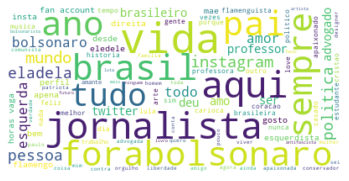

Cluster :  2


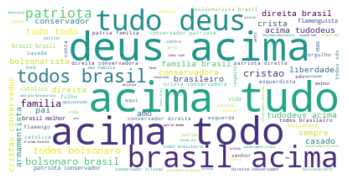

In [62]:
result = pd.DataFrame({'user': users_df['user_name'], 'description': users_df['preproc_desc'], 'cluster':labels})

for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['description'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [65]:
true_k = 2
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_
pd.Series(labels).value_counts()

0    162369
1      2575
dtype: int64

Cluster :  0


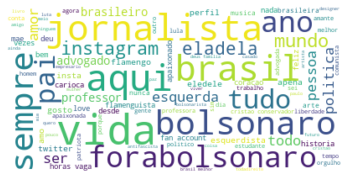

Cluster :  1


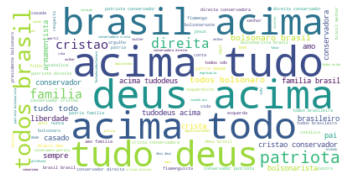

In [66]:
result = pd.DataFrame({'user': users_df['user_name'], 'description': users_df['preproc_desc'], 'cluster':labels})

for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['description'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()